In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('netflix_titles.csv')

In [3]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
data['duration'].unique

<bound method Series.unique of 0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object>

In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [7]:
data.director.isnull().sum()

2634

In [8]:
data.isnull().sum()/100

show_id          0.00
type             0.00
title            0.00
director        26.34
cast             8.25
country          8.31
date_added       0.10
release_year     0.00
rating           0.04
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

In [9]:
data.fillna("Not Given" , inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:
data.duration.value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

In [12]:
data['duration'].nunique()

221

In [13]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Given,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
data.shape

(8807, 12)

In [15]:
content_percent=(data.type.value_counts().to_frame()/8807)*100

In [16]:
content_percent.reset_index(inplace=True)

In [17]:
content_percent

,type,count
0,Movie,69.615079
1,TV Show,30.384921


Text(0.5, 1.0, 'Content Distribution')

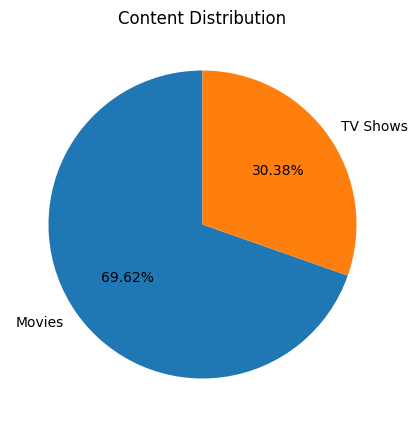

In [18]:
labels = ['Movies' , 'TV Shows']
plt.figure(figsize=(6,5))
plt.pie(content_percent['count'] ,labels=labels, autopct='%1.2f%%' , startangle=90 )
plt.title('Content Distribution')

In [19]:
directed_most=data['director'].value_counts().to_frame()

In [20]:
directed_most.reset_index(inplace=True)

In [21]:
directed_most.drop(0 , inplace=True)

In [22]:
most_directed_content=directed_most.sort_values(by='count', ascending=False).head(10)

In [23]:
most_directed_content

,director,count
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
8,Youssef Chahine,12
9,Martin Scorsese,12
7,Jay Chapman,12
10,Steven Spielberg,11


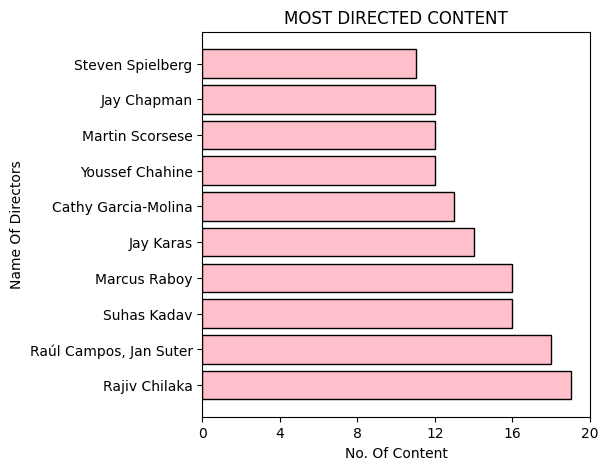

In [24]:
plt.figure(figsize=(5,5))
plt.barh(most_directed_content['director'] , most_directed_content['count'] , data=most_directed_content , facecolor='pink' , edgecolor='black')
plt.title("MOST DIRECTED CONTENT")
plt.xlabel("No. Of Content")
plt.xticks(range(0, 21, 4))
plt.ylabel("Name Of Directors")
plt.show()

In [25]:
country_wise_content=data['country'].value_counts().to_frame().reset_index().drop(2).sort_values(by='count' , ascending=False).head(10)

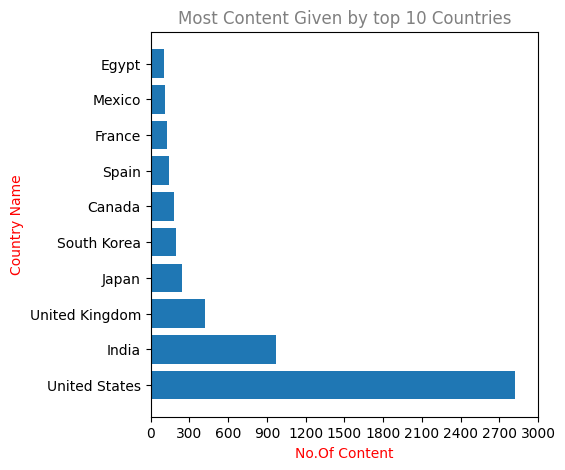

In [26]:
plt.figure(figsize=(5,5))
plt.barh(country_wise_content['country'] , country_wise_content['count'] , data=country_wise_content)
plt.title("Most Content Given by top 10 Countries" , color='Gray')
plt.xlabel("No.Of Content",color = 'RED')
plt.xticks(range(0,3001,300))
plt.ylabel("Country Name" , color = 'RED')
plt.show()

In [27]:
data[['Month' , 'Day' , 'Year']]=data['date_added'].str.split(expand=True)

In [28]:
data['Month'].value_counts()

Month
July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Not           10
Name: count, dtype: int64

In [29]:
df=data.groupby('Month')['Year'].value_counts().to_frame()

In [30]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df)

                count
Month     Year       
April     2021    188
          2020    177
          2019    162
          2018    115
          2017     93
          2016     22
          2015      5
          2014      2
August    2021    178
          2018    164
          2019    131
          2020    129
          2017    115
          2016     34
          2015      2
          2013      1
          2014      1
December  2019    215
          2018    185
          2020    169
          2017    118
          2016     96
          2015     21
          2014      6
          2013      2
          2012      1
February  2019    148
          2020    114
          2021    109
          2018     87
          2017     82
          2016     15
          2015      4
          2014      2
          2008      1
          2012      1
January   2020    205
          2019    153
          2021    132
          2018    129
          2017     72
          2016     43
          2014      2
          

In [34]:
rating_freq=data['rating'].value_counts().to_frame().reset_index()

In [35]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Day,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,"25,",2021
1,s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,"24,",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,"24,",2021
3,s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,"24,",2021
4,s5,TV Show,Kota Factory,Not Given,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,"24,",2021


In [57]:
title_added_by_year=data.groupby('Year')['title'].count().to_frame().reset_index()

In [59]:
title_by_release_year=data.groupby('release_year')['title'].count().to_frame().reset_index()

In [66]:
data.loc[:,['title','listed_in','release_year']]

,title,listed_in,release_year
0,Dick Johnson Is Dead,Documentaries,2020
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",2021
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",2021
3,Jailbirds New Orleans,"Docuseries, Reality TV",2021
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",2021
5,Midnight Mass,"TV Dramas, TV Horror, TV Mysteries",2021
6,My Little Pony: A New Generation,Children & Family Movies,2021
7,Sankofa,"Dramas, Independent Movies, International Movies",1993
8,The Great British Baking Show,"British TV Shows, Reality TV",2021
9,The Starling,"Comedies, Dramas",2021


In [77]:
for_trend=data.groupby('release_year')['listed_in'].value_counts().to_frame().reset_index()

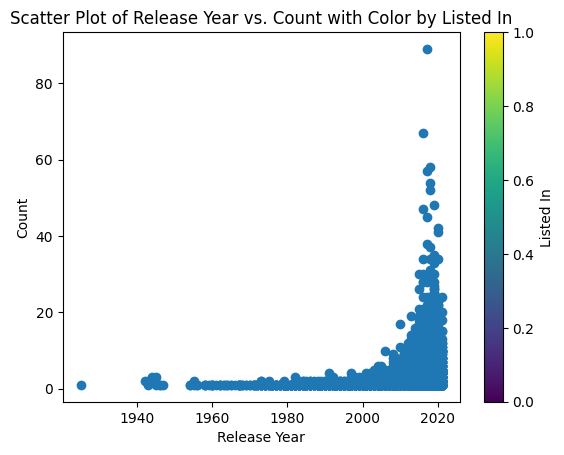

In [82]:
plt.scatter(for_trend['release_year'], for_trend['count'] )
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Scatter Plot of Release Year vs. Count with Color by Listed In')
plt.colorbar(label='Listed In')
plt.show()

In [83]:
shows_added_per_year = data.groupby('Year').size()


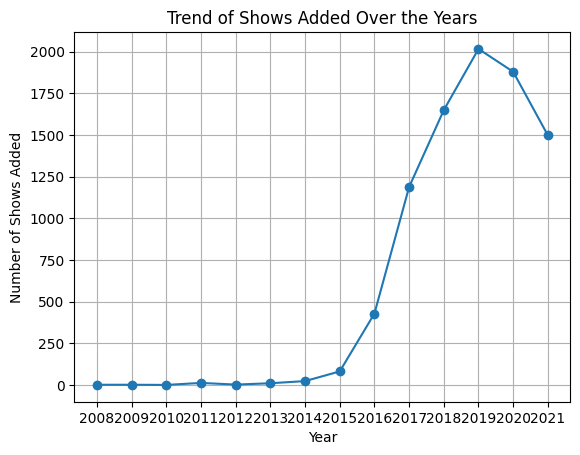

In [86]:
plt.plot(shows_added_per_year.index, shows_added_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.title('Trend of Shows Added Over the Years')
plt.grid(True)
plt.show()

In [98]:
monthwise_added=data.groupby('Month')['title'].count().to_frame().reset_index().drop(9)

In [99]:
monthwise_added.max()

Month    September
title          827
dtype: object

In [100]:
monthwise_added.min()

Month    April
title      563
dtype: object

In [106]:
genre_count=data['listed_in'].value_counts().to_frame().reset_index()

In [107]:
genre_count.max()

listed_in    Thrillers
count              362
dtype: object

In [108]:
genre_count.min()

listed_in    Action & Adventure
count                         1
dtype: object

In [119]:
genre_rating_count=data.groupby('rating')['listed_in'].count().to_frame().reset_index().drop([0,1,2])

In [130]:
cast_split = data['cast'].str.split(', ')

all_cast = [actor for sublist in cast_split for actor in sublist if actor.strip()]

cast_count = pd.Series(all_cast).value_counts()

top_cast = cast_count.head(10)

In [147]:
top_cast.to_frame().reset_index().drop(0,inplace=True)